In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read data
Data = pd.read_csv(r'C:\Users\User\Desktop\decision_tree_models\data.csv')
print('Data = \n',Data.head(10))

Data = 
          X1        Y1        X2        Y2        X3        Y3        X4  \
0  0.860019 -3.096488  0.753413 -2.530522  0.629331 -1.962419  0.361692   
1  0.456454 -2.852605  0.565661 -2.188466  0.568863 -1.593943  0.363601   
2 -0.462493 -2.031486 -0.125549 -1.528304  0.123850 -1.026633  0.238231   
3  0.106369 -2.186939  0.116188 -1.520864  0.142727 -0.703652  0.068778   
4  0.381094 -3.316631  0.390072 -2.754067  0.427469 -2.131407  0.336888   
5 -0.262968 -3.256483 -0.094474 -2.594541  0.073604 -1.954448  0.088474   
6 -0.970940 -2.595038 -0.683583 -2.042165 -0.376025 -1.472786 -0.190104   
7 -0.304093 -1.997585 -0.215963 -1.307632 -0.116897 -0.454085 -0.069022   
8  0.055419 -3.592592  0.131205 -2.973669  0.252867 -2.286043  0.242098   
9 -0.344932 -3.766955 -0.137432 -2.997226  0.053303 -2.269871  0.066792   

         Y4      Angle        X5        Y5        X6        Y6        X7  \
0 -1.227911  15.958005  0.456454 -2.852605  0.565661 -2.188466  0.568863   
1 -0.907820  

In [3]:
DataA4= Data.loc[(Data['Angle number'] ==4) & (Data['RightorLeft'] ==1)]
print('Data = \n',DataA4.head(10))

Data = 
            X1        Y1        X2        Y2        X3        Y3        X4  \
201  0.750432 -2.153865  0.686756 -1.823544  0.595140 -1.453063  0.405885   
205  0.667123 -2.519001  0.608058 -2.151844  0.527485 -1.708688  0.361519   
214  0.555894 -1.577428  0.552039 -1.661372  0.545762 -1.656400  0.422923   
223  0.506216 -2.204573  0.481335 -1.927619  0.429110 -1.548306  0.308509   
227  0.963706 -1.664357  0.885037 -1.448543  0.765535 -1.168633  0.498884   
231  1.082005 -1.981829  0.961348 -1.685113  0.814596 -1.350497  0.518018   
235  1.204984 -1.917022  1.065042 -1.607764  0.894401 -1.282069  0.576588   
239  1.088840 -2.270624  0.979289 -1.900214  0.833697 -1.495874  0.548765   
246  0.957857 -2.190403  0.879275 -1.950590  0.766459 -1.624965  0.506324   
253  1.234372 -1.891574  1.136363 -1.732223  0.987450 -1.529549  0.663514   

           Y4      Angle        X5        Y5        X6        Y6        X7  \
201 -0.773427  20.652780  1.646042 -1.069440  1.452755 -0.948153 

In [4]:
DataA4_ = DataA4.drop("Angle number", axis=1)
DataA4_prepared = DataA4_.drop("RightorLeft", axis=1)

In [5]:
DataA4_prepared

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,Angle,X5,Y5,X6,Y6,X7,Y7,X8,Y8
201,0.750432,-2.153865,0.686756,-1.823544,0.595140,-1.453063,0.405885,-0.773427,20.652780,1.646042,-1.069440,1.452755,-0.948153,1.280345,-0.807251,0.839253,-0.394644
205,0.667123,-2.519001,0.608058,-2.151844,0.527485,-1.708688,0.361519,-0.898549,19.240998,1.615891,-1.540980,1.412971,-1.325534,1.230381,-1.112541,0.797685,-0.533224
214,0.555894,-1.577428,0.552039,-1.661372,0.545762,-1.656400,0.422923,-1.074147,6.851526,1.139466,-1.222910,1.151610,-1.302208,1.132681,-1.275804,0.923281,-0.705719
223,0.506216,-2.204573,0.481335,-1.927619,0.429110,-1.548306,0.308509,-0.816600,15.834790,1.509235,-1.371603,1.325370,-1.176226,1.146077,-0.973098,0.743832,-0.464935
227,0.963706,-1.664357,0.885037,-1.448543,0.765535,-1.168633,0.498884,-0.613814,14.443180,1.655171,-0.600084,1.485335,-0.539817,1.310740,-0.465274,0.855795,-0.177698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,0.527369,-1.827589,0.520768,-1.791950,0.493271,-1.616687,0.356522,-0.923812,14.318214,1.395422,-1.388995,1.269459,-1.259292,1.137468,-1.124277,0.779420,-0.555476
4369,0.746784,-1.803415,0.717512,-1.630466,0.643735,-1.328209,0.431845,-0.697649,11.955444,1.445434,-0.861886,1.320425,-0.795770,1.182076,-0.687754,0.800401,-0.286901
4373,0.655281,-2.473886,0.604214,-2.163368,0.528162,-1.702950,0.361862,-0.878469,10.119420,1.507972,-1.657310,1.333562,-1.377495,1.156682,-1.122045,0.768028,-0.501968
4377,-0.062741,-1.551747,0.045611,-1.411194,0.127355,-1.191181,0.166852,-0.674771,16.413348,0.999667,-0.749717,0.921627,-0.763741,0.865024,-0.686507,0.651504,-0.368527


In [6]:
# import seaborn as sns
# sns.pairplot(DataA4_prepared)

In [7]:
# split the data 
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(DataA4_prepared, test_size=0.2, random_state=42)

In [8]:
test_set.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,Angle,X5,Y5,X6,Y6,X7,Y7,X8,Y8
1089,1.042912,-2.491290,0.912660,-2.061526,0.751129,-1.571179,0.472451,-0.800083,25.758825,1.926854,-1.255068,1.647889,-1.063155,1.401903,-0.867797,0.840699,-0.388213
3012,0.588010,-1.460858,0.630773,-1.588920,0.600789,-1.454074,0.412134,-0.817797,12.204523,1.469152,-1.282391,1.319896,-1.161435,1.160128,-0.976707,0.772930,-0.427095
235,1.204984,-1.917022,1.065042,-1.607764,0.894401,-1.282069,0.576588,-0.685132,14.120406,1.815484,-0.681335,1.621158,-0.620703,1.441985,-0.547845,0.958036,-0.237080
2765,0.700988,-2.274040,0.643366,-1.939941,0.558792,-1.528424,0.384048,-0.820565,24.062930,1.823261,-1.518187,1.566485,-1.239523,1.335830,-0.995064,0.815245,-0.453122
2720,1.184117,-1.929820,1.063398,-1.712211,0.880588,-1.393620,0.546386,-0.744676,18.725694,1.884032,-0.873075,1.651880,-0.820544,1.438298,-0.722705,0.910184,-0.339365


In [9]:
DataA4_prepared = train_set.copy()

In [10]:
corr_matrix = DataA4_prepared.corr()
corr_matrix["Angle"].sort_values(ascending=False)

Angle    1.000000
X5       0.417118
X6       0.358153
X7       0.292916
X1       0.167877
X2       0.138084
X3       0.092608
X4       0.035443
X8       0.026394
Y4      -0.008267
Y8      -0.012333
Y7      -0.020056
Y6      -0.053337
Y5      -0.091369
Y3      -0.095787
Y2      -0.161899
Y1      -0.214963
Name: Angle, dtype: float64

In [11]:
# Prepare the data for Machine Learning algorithms

DataA4_prepared = train_set.drop("Angle", axis=1) # drop labels for training set
DataA4_prepared_label = train_set["Angle"].copy()

In [12]:
# Select and train a model 

from sklearn.svm import SVR
dc_tr=SVR(kernel = 'rbf')
dc_tr.fit(DataA4_prepared, DataA4_prepared_label)

SVR()

In [13]:
some_data = DataA4_prepared.iloc[:5]
some_labels = DataA4_prepared_label.iloc[:5]
print("Predictions:", dc_tr.predict(some_data))

Predictions: [16.29653198 13.75663306 15.07094854 11.74133332 16.69502753]


In [14]:
# Compare against the actual values:

print("Labels:", list(some_labels))

Labels: [16.03562226, 11.95544364, 16.76524959, 5.936372281, 21.59223488]


In [15]:
from sklearn.metrics import mean_squared_error

Data_predictions = dc_tr.predict(DataA4_prepared)
lin_mse = mean_squared_error(DataA4_prepared_label, Data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.4535978745202245

In [16]:
# Cross Validation

from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(dc_tr, DataA4_prepared, DataA4_prepared_label,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [3.91519305 3.65228818 4.69532047 5.02900813 4.42149263 4.31427061
 4.32864605 4.99647268 4.72100869 4.69426558]
Mean: 4.476796606845264
Standard deviation: 0.42146414768675977


In [18]:
X_test = test_set.drop("Angle", axis=1)
y_test = test_set["Angle"].copy()

final_predictions = dc_tr.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

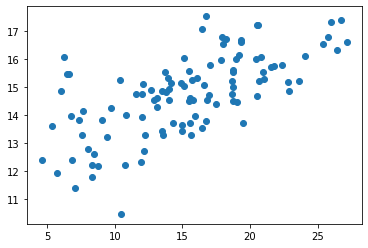

In [19]:
plt.scatter(y_test, final_predictions)

(array([ 5.,  5., 10.,  9., 22., 19., 15., 10.,  5.,  6.]),
 array([-9.84329967, -7.80635883, -5.76941798, -3.73247714, -1.69553629,
         0.34140455,  2.3783454 ,  4.41528624,  6.45222709,  8.48916793,
        10.52610878]),
 <BarContainer object of 10 artists>)

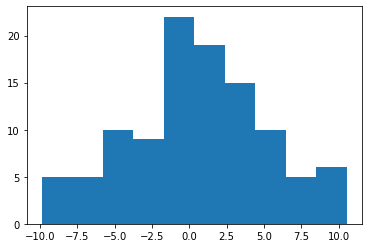

In [20]:
plt.hist(y_test - final_predictions)

In [21]:
final_rmse

4.6345012344236025

In [22]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([4.02588502, 5.17198735])

In [23]:
import sklearn.metrics as sm

print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, final_predictions), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, final_predictions), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, final_predictions), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, final_predictions), 2))
print("R2 score =", round(sm.r2_score(y_test, final_predictions), 2))

Regressor model performance:
Mean absolute error(MAE) = 3.7
Mean squared error(MSE) = 21.48
Median absolute error = 3.09
Explain variance score = 0.28
R2 score = 0.27


In [24]:
def mean_absolute_percentage_error(y_test, final_predictions): 
    y_test, final_predictions = np.array(y_test), np.array(final_predictions)
    return np.mean(np.abs((y_test - final_predictions) / final_predictions)) * 100

In [25]:
print(mean_absolute_percentage_error(y_test, final_predictions))

25.022587558404112
